In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./WHR2018Chapter2OnlineData.csv')

In [3]:
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [4]:
df.shape

(1562, 19)

In [5]:
df.columns

Index(['country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-15',
       'gini of household income reported in Gallup, by wp5-year'],
      dtype='object')

In [6]:
# now we can move on to handling the missing data in the dataset.
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

# nan_detected tells us that a column has null values, not how many
nan_detected = nan_count!=0
nan_detected

# it only makes sense to replace the values of the features with numeric data, i.e., float64 & int 64. 
# so, we can do the following to collect those
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
is_int_or_float

# to_impute will tell us if a given feature is both of numeric data AND has missing values
to_impute = nan_detected & is_int_or_float
to_impute

to_impute_selected = df.columns[to_impute].tolist()
to_impute_selected

# giv
for colname in to_impute_selected:
    df[colname +'_na'] = df[colname].isnull()
df.head()

for colname in to_impute_selected: 
    df[colname].fillna(np.mean(df[colname]), inplace=True)
    
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

Log GDP per capita missing values count :0
Social support missing values count :0
Healthy life expectancy at birth missing values count :0
Freedom to make life choices missing values count :0
Generosity missing values count :0
Perceptions of corruption missing values count :0
Positive affect missing values count :0
Negative affect missing values count :0
Confidence in national government missing values count :0
Democratic Quality missing values count :0
Delivery Quality missing values count :0
GINI index (World Bank estimate) missing values count :0
GINI index (World Bank estimate), average 2000-15 missing values count :0
gini of household income reported in Gallup, by wp5-year missing values count :0


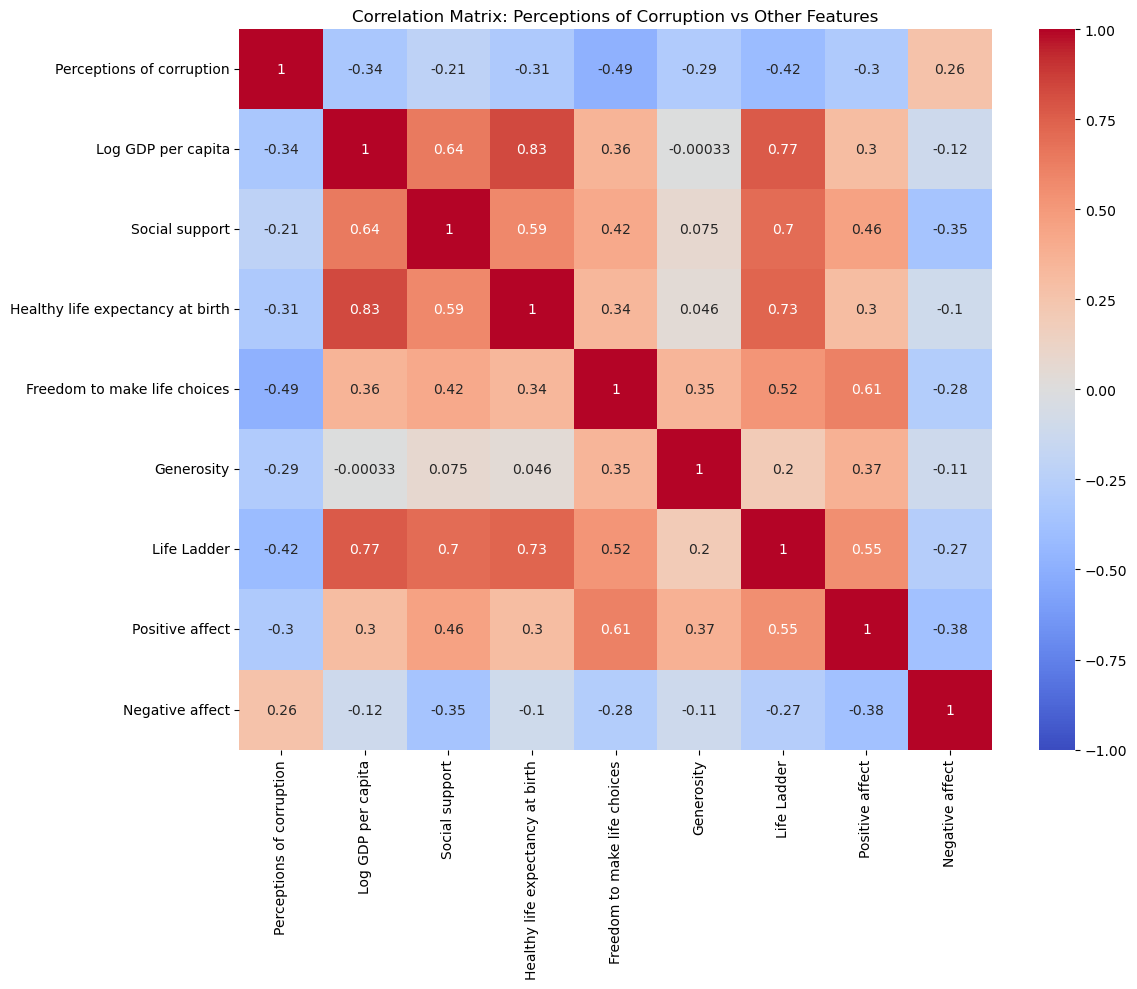

Perceptions of corruption           1.000000
Negative affect                     0.259926
Social support                     -0.214673
Generosity                         -0.290899
Positive affect                    -0.297001
Healthy life expectancy at birth   -0.305440
Log GDP per capita                 -0.335832
Life Ladder                        -0.417145
Freedom to make life choices       -0.485877
Name: Perceptions of corruption, dtype: float64


In [7]:
corr_fe = ['Perceptions of corruption', 'Log GDP per capita', 'Social support', 
            'Healthy life expectancy at birth', 'Freedom to make life choices', 
            'Generosity', 'Life Ladder', 'Positive affect', 'Negative affect']

# Create correlation matrix
corr_matrix = df[corr_fe].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix: Perceptions of Corruption vs Other Features')
plt.tight_layout()
plt.show()

# Print correlation values for 'Perceptions of corruption'
print(corr_matrix['Perceptions of corruption'].sort_values(ascending=False))

In [8]:
to_encode = list(df.select_dtypes(include=['object']).columns)
to_encode

['country']

In [9]:
from sklearn.preprocessing import OneHotEncoder # Import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))
df_enc.head()

,0,1,2,3,4,5,6,7,8,9,...,154,155,156,157,158,159,160,161,162,163
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_enc.columns = encoder.get_feature_names_out(to_encode)
df_enc.head()

,country_Afghanistan,country_Albania,country_Algeria,country_Angola,country_Argentina,country_Armenia,country_Australia,country_Austria,country_Azerbaijan,country_Bahrain,...,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,country_Venezuela,country_Vietnam,country_Yemen,country_Zambia,country_Zimbabwe
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.drop(columns = to_encode, inplace=True)

In [12]:
df = df.join(df_enc)
df.columns

Index(['year', 'Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect',
       ...
       'country_United Arab Emirates', 'country_United Kingdom',
       'country_United States', 'country_Uruguay', 'country_Uzbekistan',
       'country_Venezuela', 'country_Vietnam', 'country_Yemen',
       'country_Zambia', 'country_Zimbabwe'],
      dtype='object', length=196)

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Select features and target
# features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
#             'Freedom to make life choices', 'Generosity', 'Life Ladder']
all_columns = df.columns.tolist()
exclude_columns = ['Life Ladder', 'Freedom to make life choices', 'Positive affect', 'Negative affect', 'Perceptions of corruption']
features = [col for col in all_columns if col not in exclude_columns]
X = df[features]
y = df['Life Ladder']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

Mean Squared Error: 0.03392773168483704
R-squared Score: 0.9737602976237375


In [15]:
for feature, coef in zip(features, model.coef_):
    print(f'{feature}: {coef}')

year: -0.00046717227237429924
Log GDP per capita: 0.18336212738006175
Social support: 0.08946917055571763
Healthy life expectancy at birth: 0.03320917254564454
Generosity: 0.10952456998517332
Confidence in national government: 0.3302583000356752
Democratic Quality: 0.023709023828385523
Delivery Quality: -0.021436610665974562
Standard deviation of ladder by country-year: 1.6879446679230736
Standard deviation/Mean of ladder by country-year: -8.479695829666177
GINI index (World Bank estimate): 0.06033830314573774
GINI index (World Bank estimate), average 2000-15: 0.36655444858699704
gini of household income reported in Gallup, by wp5-year: -0.06477481750119118
Log GDP per capita_na: 0.07071670067433078
Social support_na: 0.1490615791845991
Healthy life expectancy at birth_na: -0.2544238117659832
Freedom to make life choices_na: 0.059959093690000964
Generosity_na: 0.11230189015583858
Perceptions of corruption_na: -0.1315928283447878
Positive affect_na: -0.08870007022271031
Negative affect_

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,precision_recall_curve

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Linear Regression - MSE: 0.0340, R2: 0.9737
Neural Network - MSE: 0.0448, R2: 0.9654


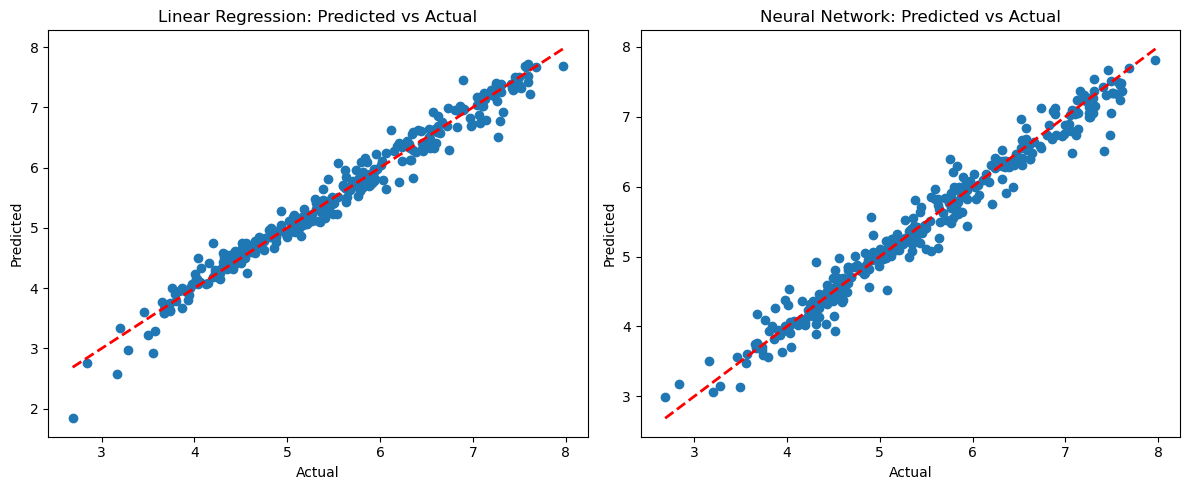

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)

# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

nn_predictions = nn_model.predict(X_test_scaled).flatten()

# Evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}")

evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, nn_predictions, "Neural Network")

# Plot predictions vs actual
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Predicted vs Actual")

plt.subplot(1, 2, 2)
plt.scatter(y_test, nn_predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Neural Network: Predicted vs Actual")

plt.tight_layout()
plt.show()

In [ ]:
# import scipy.stats as stats
# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# # Exclude one-hot encoded columns
# one_hot_prefixes = ['room_type_', 'neighbourhood_group_cleansed_']
# columns_to_winsorize = [col for col in numeric_columns if not any(col.startswith(prefix) for prefix in one_hot_prefixes)]

# # Apply winsorizing to selected numeric columns
# for column in columns_to_winsorize:
#     df[f'{column}_winsorized'] = stats.mstats.winsorize(df[column], limits=[0.01, 0.01])

# # Verify the new columns have been added
# print("Winsorized columns:")
# print([col for col in df.columns if col.endswith('_winsorized')])

# # Optional: Print summary statistics to compare original and winsorized columns
# for column in columns_to_winsorize:
#     print(f"\nOriginal {column}:")
#     print(df[column].describe())
#     print(f"\nWinsorized {column}_winsorized:")
#     print(df[f'{column}_winsorized'].describe())